# Potential energy and trial functions

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to investigate some potential energy

In [ ]:
import micropip
await micropip.install("ipympl")

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pylab as plt
from ipywidgets import widgets, interact

%matplotlib widget

In [ ]:
F = 10
EI = 20e3
L = 3

In [4]:
# Polynomial trial function
x, C1, C2, C3, C4, F, u0= sym.symbols('x, C1, C2, C3, C4, F, u0')
w = C1*x**3+C2*x**2+C3*x + C4
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.diff(x).subs(x,0),0)
eq3 = sym.Eq((-w.diff(x,2)*EI).subs(x,L),0)
eq4 = sym.Eq(w.subs(x,L),u0)
sol = sym.solve((eq1, eq2,eq3,eq4),(C1,C2,C3,C4))
w_sol = sym.nsimplify(w.subs(sol))
w_numpy_polynomial = sym.lambdify((u0,x),w_sol)

M_sol_polynomial = sym.nsimplify(EI * w_sol.diff(x,2))

Ev_polynomial = sym.integrate(sym.nsimplify(M_sol_polynomial**2/(EI*2)),(x,0,3))

Ev_numpy_polynomial = sym.lambdify(u0,Ev_polynomial)

V_polynomial = Ev_polynomial - 10 * u0
V_numpy_polynomial = sym.lambdify(u0,V_polynomial)

In [5]:
# Cosine trial function
w_sol = u0*sym.sin(x/12*2*sym.pi-sym.pi/2)+u0
w_numpy_sin = sym.lambdify((u0,x),w_sol)

M_sol_sin = sym.nsimplify(EI * w_sol.diff(x,2))

Ev_sin = sym.integrate(sym.nsimplify(M_sol_sin**2/(EI*2)),(x,0,3))

Ev_numpy_sin = sym.lambdify(u0,Ev_sin)

V_sin = Ev_sin - 10 * u0
V_numpy_sin = sym.lambdify(u0,V_sin)

In [6]:
# Sin trial function
w_sol = 2*u0*(sym.cosh(x/sym.pi))-2*u0
w_numpy_cosh = sym.lambdify((u0,x),w_sol)

M_sol_cosh = sym.nsimplify(EI * w_sol.diff(x,2))

Ev_cosh = sym.integrate(sym.nsimplify(M_sol_cosh**2/(EI*2)),(x,0,3))

Ev_numpy_cosh = sym.lambdify(u0,Ev_cosh)

V_cosh = Ev_cosh - 10 * u0
V_numpy_cosh = sym.lambdify(u0,V_cosh)

interactive(children=(FloatSlider(value=0.0, description='Displacement u_0', layout=Layout(width='400px'), max…

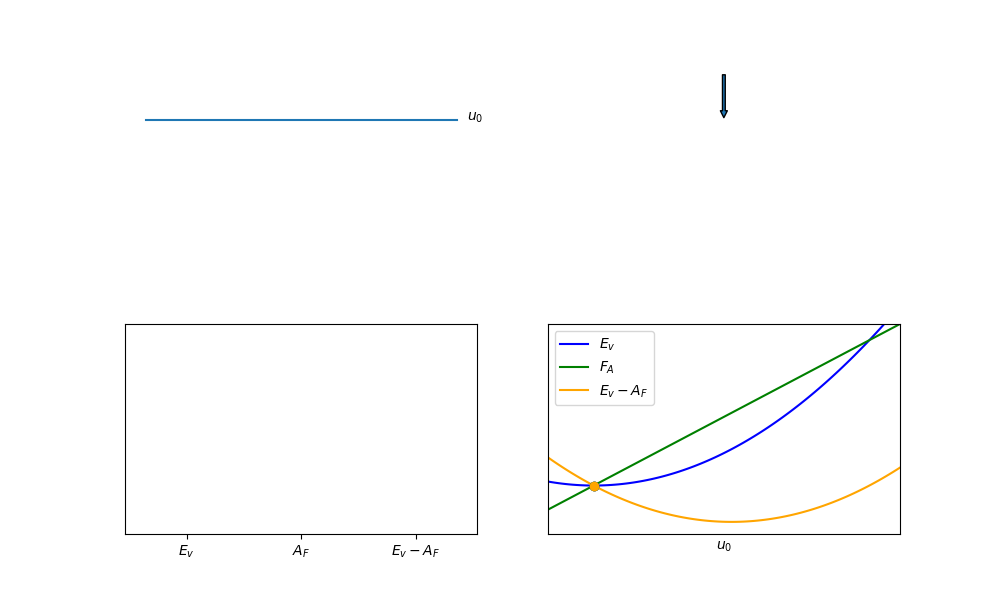

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
def func(u,trial_function):
    axs[0,0].clear()
    axs[0,1].clear()
    axs[1,0].clear()
    axs[1,1].clear()

    x = np.linspace(0,3,100)
    if trial_function == 'Polynomial':
        w_numpy = w_numpy_polynomial
        Ev_numpy = Ev_numpy_polynomial
        V_numpy = V_numpy_polynomial
    elif trial_function == 'cos':
        w_numpy = w_numpy_sin
        Ev_numpy = Ev_numpy_sin
        V_numpy = V_numpy_sin
    elif trial_function == 'cosh':
        w_numpy = w_numpy_cosh
        Ev_numpy = Ev_numpy_cosh
        V_numpy = V_numpy_cosh
    axs[0,0].plot(x,w_numpy(u,x))
    axs[0,0].set_xlim([-0.2,3.2])
    axs[0,0].set_ylim([-0.003,0.01])
    axs[0,0].invert_yaxis()
    axs[0,0].annotate(text='', xy=(3,w_numpy(u,3)), xytext=(3,0), arrowprops=dict(arrowstyle='fancy'))
    axs[0,0].text(3.1,w_numpy(u,3),'$u_0$')
    axs[0,0].axis('off')
    axs[0,1].axis('off')
    axs[0,1].set_xlim([-0.2,3.2])
    axs[0,1].set_ylim([-0.003,0.01])
    axs[0,1].annotate(text='', xy=(1.5,w_numpy(u,3)), xytext=(1.5,w_numpy(u,3)-0.003), arrowprops=dict(arrowstyle='simple'))
    axs[0,1].invert_yaxis()
    x_axis= ['$E_v$','$A_F$','$E_v - A_F$']
    y_axis = [Ev_numpy(u),w_numpy(u,3)*10,Ev_numpy(u)-w_numpy(u,3)*10]
    axs[1,0].bar(x_axis,y_axis,color=('blue','green','orange'))
    axs[1,0].set_ylim([-0.03,0.1])
    axs[1,0].set_yticklabels([])
    axs[1,0].set_yticks([])
    
    u_range=np.linspace(-0.0015,0.01,100)
    axs[1,1].plot(u_range,Ev_numpy(u_range),label='$E_v$',color='blue')
    axs[1,1].plot(u_range,w_numpy(u_range,3)*10,label='$F_A$',color='green')
    axs[1,1].plot(u_range,V_numpy(u_range),label='$E_v - A_F$',color='orange')
    axs[1,1].legend()
    axs[1,1].plot(u,Ev_numpy(u),'o',color='blue')
    axs[1,1].plot(u,w_numpy(u,3)*10,'o',color='green')
    axs[1,1].plot(u,Ev_numpy(u)-w_numpy(u,3)*10,'o',color='orange')
    axs[1,1].set_ylim([-0.03,0.1])
    axs[1,1].set_xlim([-0.0015,0.01])
    axs[1,1].set_xlabel('$u_0$')
    axs[1,1].set_xticks([])
    axs[1,1].set_xticklabels([])
    axs[1,1].set_yticks([])
    plt.draw()

interact(func, u = widgets.FloatSlider(min=-0.001, max=0.01, value=0, step=0.0002, description="Displacement u_0",readout_format='.4f',style= {'description_width': '180px'},layout = {'width': '400px'}),
        trial_function = widgets.ToggleButtons(options=['Polynomial', 'cos', 'cosh']));